In [32]:
#importing requored libraries for analysis of the case study
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
import os
os.getcwd()
data = pd.read_csv("Downloads/loan/loan.csv",low_memory=False)

In [36]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [38]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows",500)

In [40]:
data.shape[0]

39717

In [42]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

<Axes: >

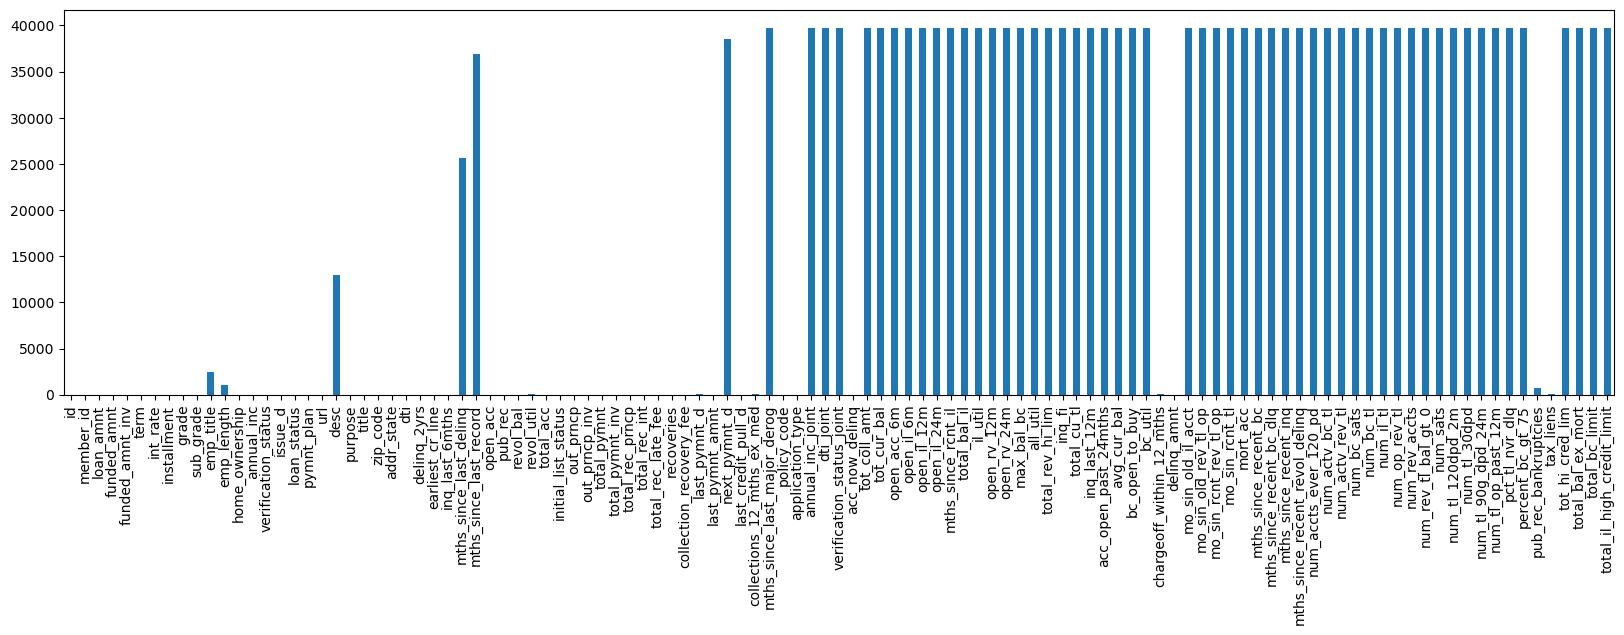

In [44]:
#plotting a graph to check for missing values
missing_values = data.isnull().sum()
missing_values.plot(kind='bar', figsize=(20, 5))

In [46]:
#From graph looks like many columns have missing values 
#So caculating missing values percentage across columns 
missing_percent=round((missing_values/data.shape[0])*100,2)

In [48]:
#Removing columns if percentage of missing values are greater than 60%
columns_to_drop=missing_percent[missing_percent>60].index

In [50]:
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [52]:
data.drop(columns=columns_to_drop, inplace=True)

In [54]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Data Cleaning 
##### int rate has % 
##### emp_length has <, +, year characters
##### term column has 'months' in values
##### issue_d has month-year format seperate month and year
##### Map 'Verified' and 'Source Verified' to 'Verified', keep 'Not Verified' as is

In [56]:
print(data['int_rate'].dtype)   # type : object

#Missing values are zero for int_rate col
#Removing % and converting obj to numeric 
data['int_rate']=data['int_rate'].str.rstrip('%').astype(float)

object


In [58]:
data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [60]:
# Aproach for cleaning emp_length 
# Step1: Acc to the data dictionary converting
# <1year to 0
# 10+ years to 10
# Step2: Removing characters and converting to string and replacing nan values with average


#Step1
data['emp_length'] =  data['emp_length'].apply(lambda x: np.nan if pd.isnull(x) else 10 if '10+' in x else 0 if '< 1' in x else int(x.split()[0]))
# Step2
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].median())

In [62]:
data.emp_length.unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [64]:
data['term'] = data['term'].apply(lambda x: int(x.split()[0]) if 'months' in x else int(x))

In [66]:
data = data.rename(columns={'term':'term_inmonths'})

In [68]:
data['term_inmonths'][0:5]

0    36
1    60
2    36
3    36
4    60
Name: term_inmonths, dtype: int64

In [70]:
#converting to datetime format 
data['issue_d']=pd.to_datetime(data['issue_d'],format='%b-%y')
#Extract month and year
data['issue_month']=data['issue_d'].dt.month
data['issue_yr'] = data['issue_d'].dt.year

In [72]:
data[['issue_month','issue_yr']][0:5]

,issue_month,issue_yr
0,12,2011
1,12,2011
2,12,2011
3,12,2011
4,12,2011


In [74]:
data['verification_group'] = data['verification_status'].replace({
    'Verified': 'Verified',
    'Source Verified': 'Verified',
    'Not Verified': 'Not Verified'
})

In [76]:
data['verification_group'].unique()

array(['Verified', 'Not Verified'], dtype=object)

In [78]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_inmonths,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_yr,verification_group
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,Verified
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,Verified
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,Not Verified
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,Verified
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,Verified


### Problem Statement
###### Identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 

<Axes: title={'center': 'Loan status distribution'}, xlabel='Loan status', ylabel='Count'>

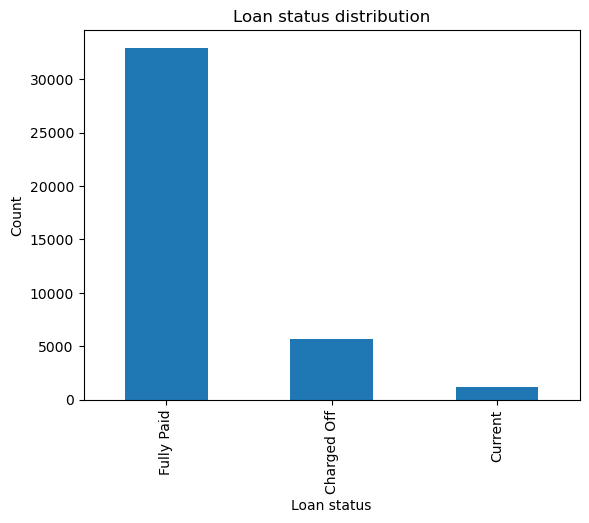

In [80]:
#UniVariate ANALYSIS ON LOAN_STATUS

loan_status_counts = data['loan_status'].value_counts()
loan_status_counts.plot(kind='bar',title='Loan status distribution',xlabel='Loan status',ylabel='Count')

##### Observation: More than 30k pain full amount
#####                  5k are chared off [risky]
#####                  nearly 1k yet to pay [part of them might be risky]

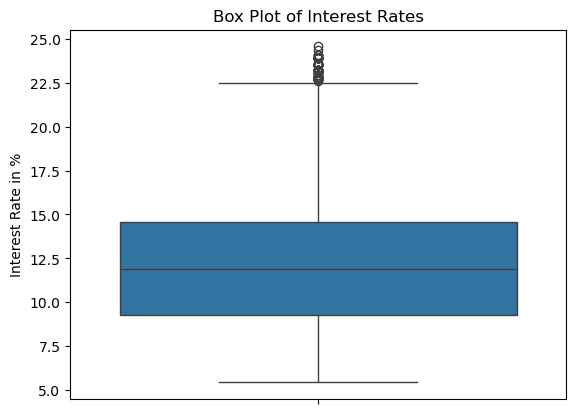

In [82]:
# Going with Box plot for clear outliers identification
sns.boxplot(y=data['int_rate'])
plt.title('Box Plot of Interest Rates')
plt.ylabel('Interest Rate in %')
plt.show()
#### Observations
##### Average is around 11 to 12 %
##### Outliers above 22.5%

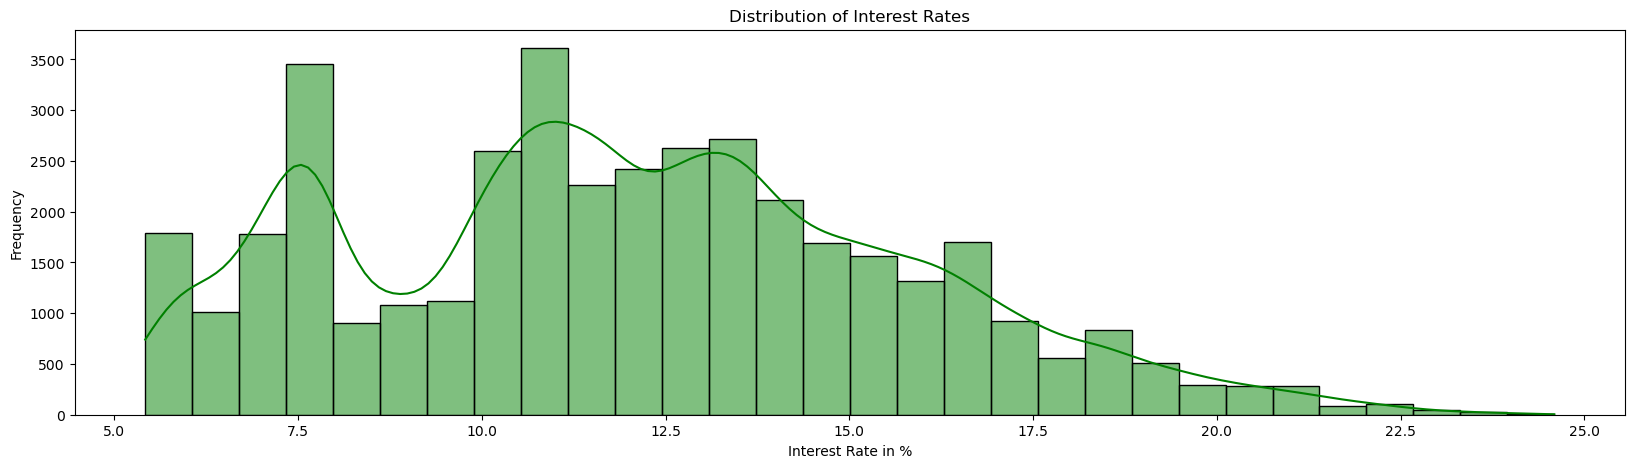

In [65]:
# Frequency plot for int rate
plt.figure(figsize=(20, 5))
sns.histplot(data['int_rate'],bins=30,kde='True',color='green')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate in %')
plt.ylabel('Frequency')
plt.show()

#### Observations
##### Bimodal Distribution [There appear to be two distinct peaks in the data]
##### Interest rates between 7-10% are the most common, indicating a preference or higher demand for loans in this interest range. A secondary cluster exists between 11-14%, showing moderate demand.
##### The right tail contains fewer loans with interest rates exceeding 20%, which could be outliers or loans for higher-risk applicants.

In [67]:
# sns.barplot(data['term_inmonths'])
# plt.title('Term Distribution')
# plt.xlabel('Term duration in months')
# plt.show()

## Most loans has term of 36months 

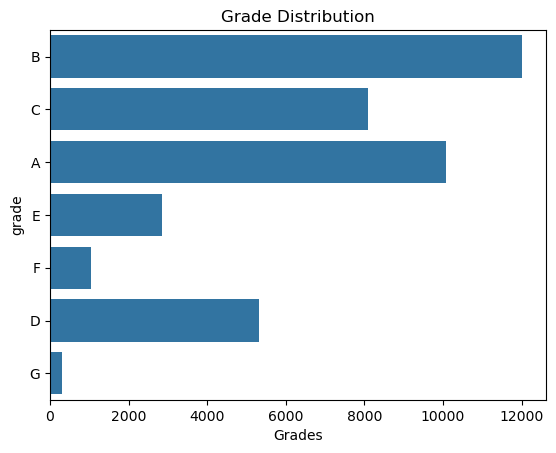

In [84]:
sns.countplot(data['grade'])
plt.title('Grade Distribution')
plt.xlabel('Grades')
plt.show()

# Grade A and B are given more loans

In [ ]:
# sns.countplot(data['emp_length'])
# plt.title('Distribution of Employment Length')
# plt.xlabel('Employment Length')

# More loans are given to experience greater than 10 years

Text(0.5, 0, 'Home ownership')

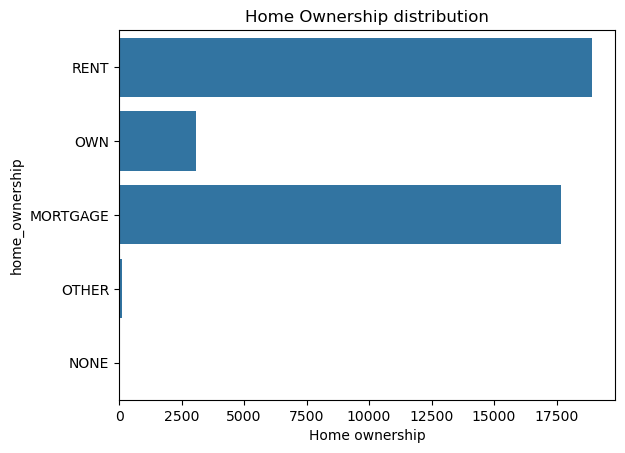

In [86]:
sns.countplot(data['home_ownership'])
plt.title('Home Ownership distribution')
plt.xlabel('Home ownership')

# Most people who take loans are rented or mortgaged

<Axes: title={'center': 'Verification status distribution'}, xlabel='Verification status', ylabel='Count'>

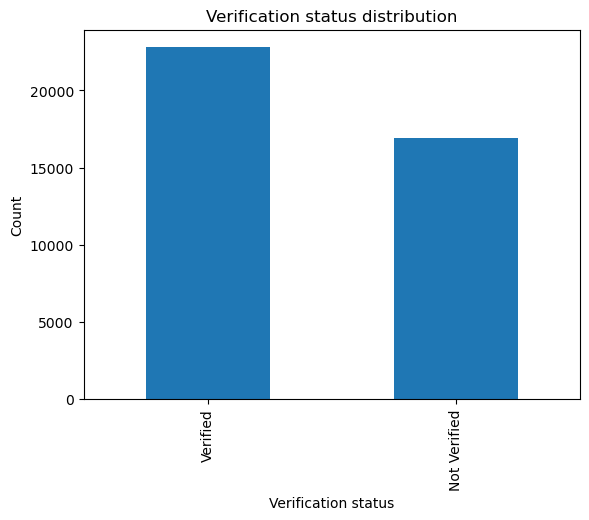

In [88]:
## Checking how many are verified or not
verification_grp_counts = data['verification_group'].value_counts()
verification_grp_counts.plot(kind='bar',title='Verification status distribution',xlabel='Verification status',ylabel='Count')
## Most of the people are verified

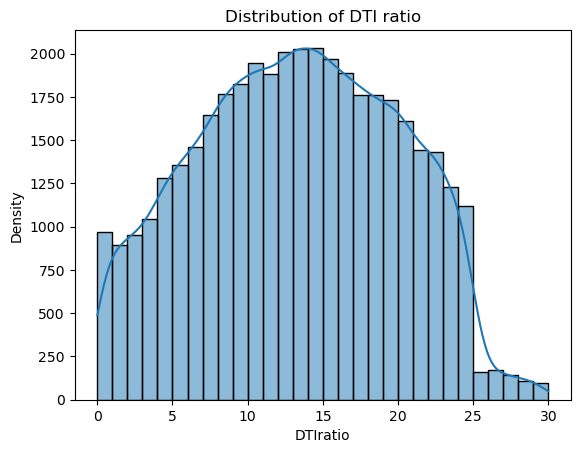

In [90]:
sns.histplot(data['dti'],kde=True,bins=30)
plt.xlabel('DTIratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio')
plt.show()

## Most of the borrowers [at xx peak] have very large debt compared to the income registerd.

In [92]:
def showplot(column1,column2):
  sns.countplot(data=data, 
                x=column1, 
                hue=column2)
  plt.show()

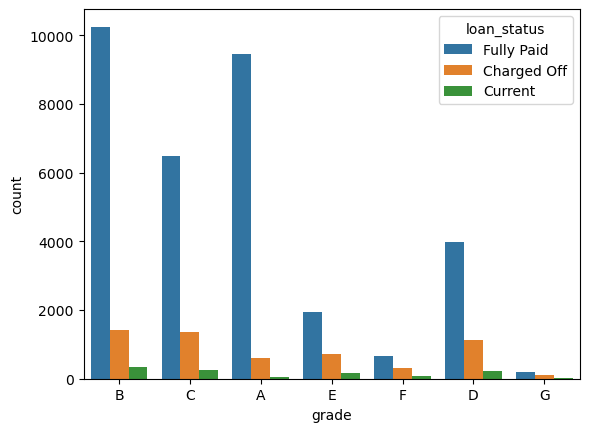

In [94]:
showplot('grade','loan_status')
## Grades A and B have largest number of loans and most of them are fully paid --> less defaulters
## Lower grades (D,E,F,G) are riskier, with more loans being charged off. [Risky]

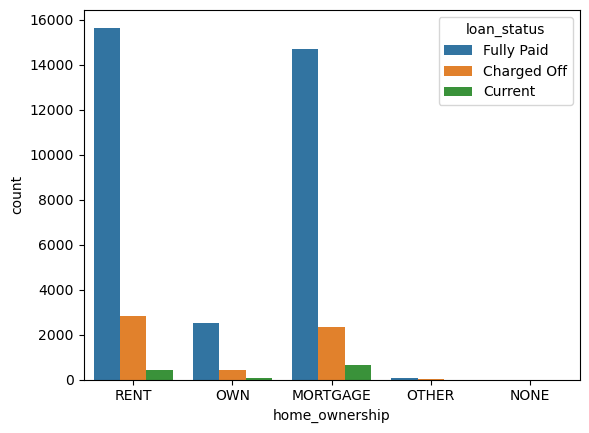

In [96]:
showplot('home_ownership','loan_status')
## Borrowers with OWN homes have a lower default rate, indicating better financial stability.
## With rent and Mortage have taken more loans and have more defaulters [Risky]

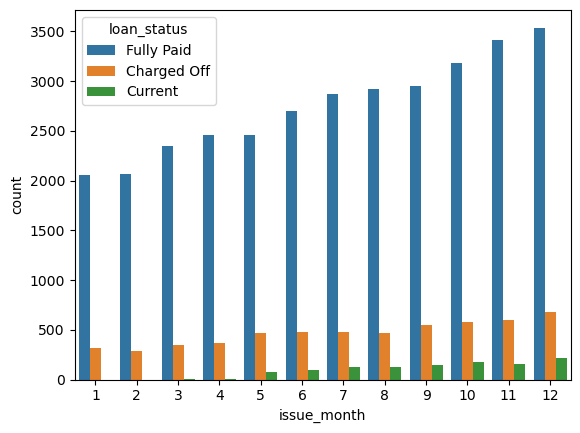

In [98]:
showplot('issue_month','loan_status')
## Borrowers are likely to take loans during end of the year and higher defaulters

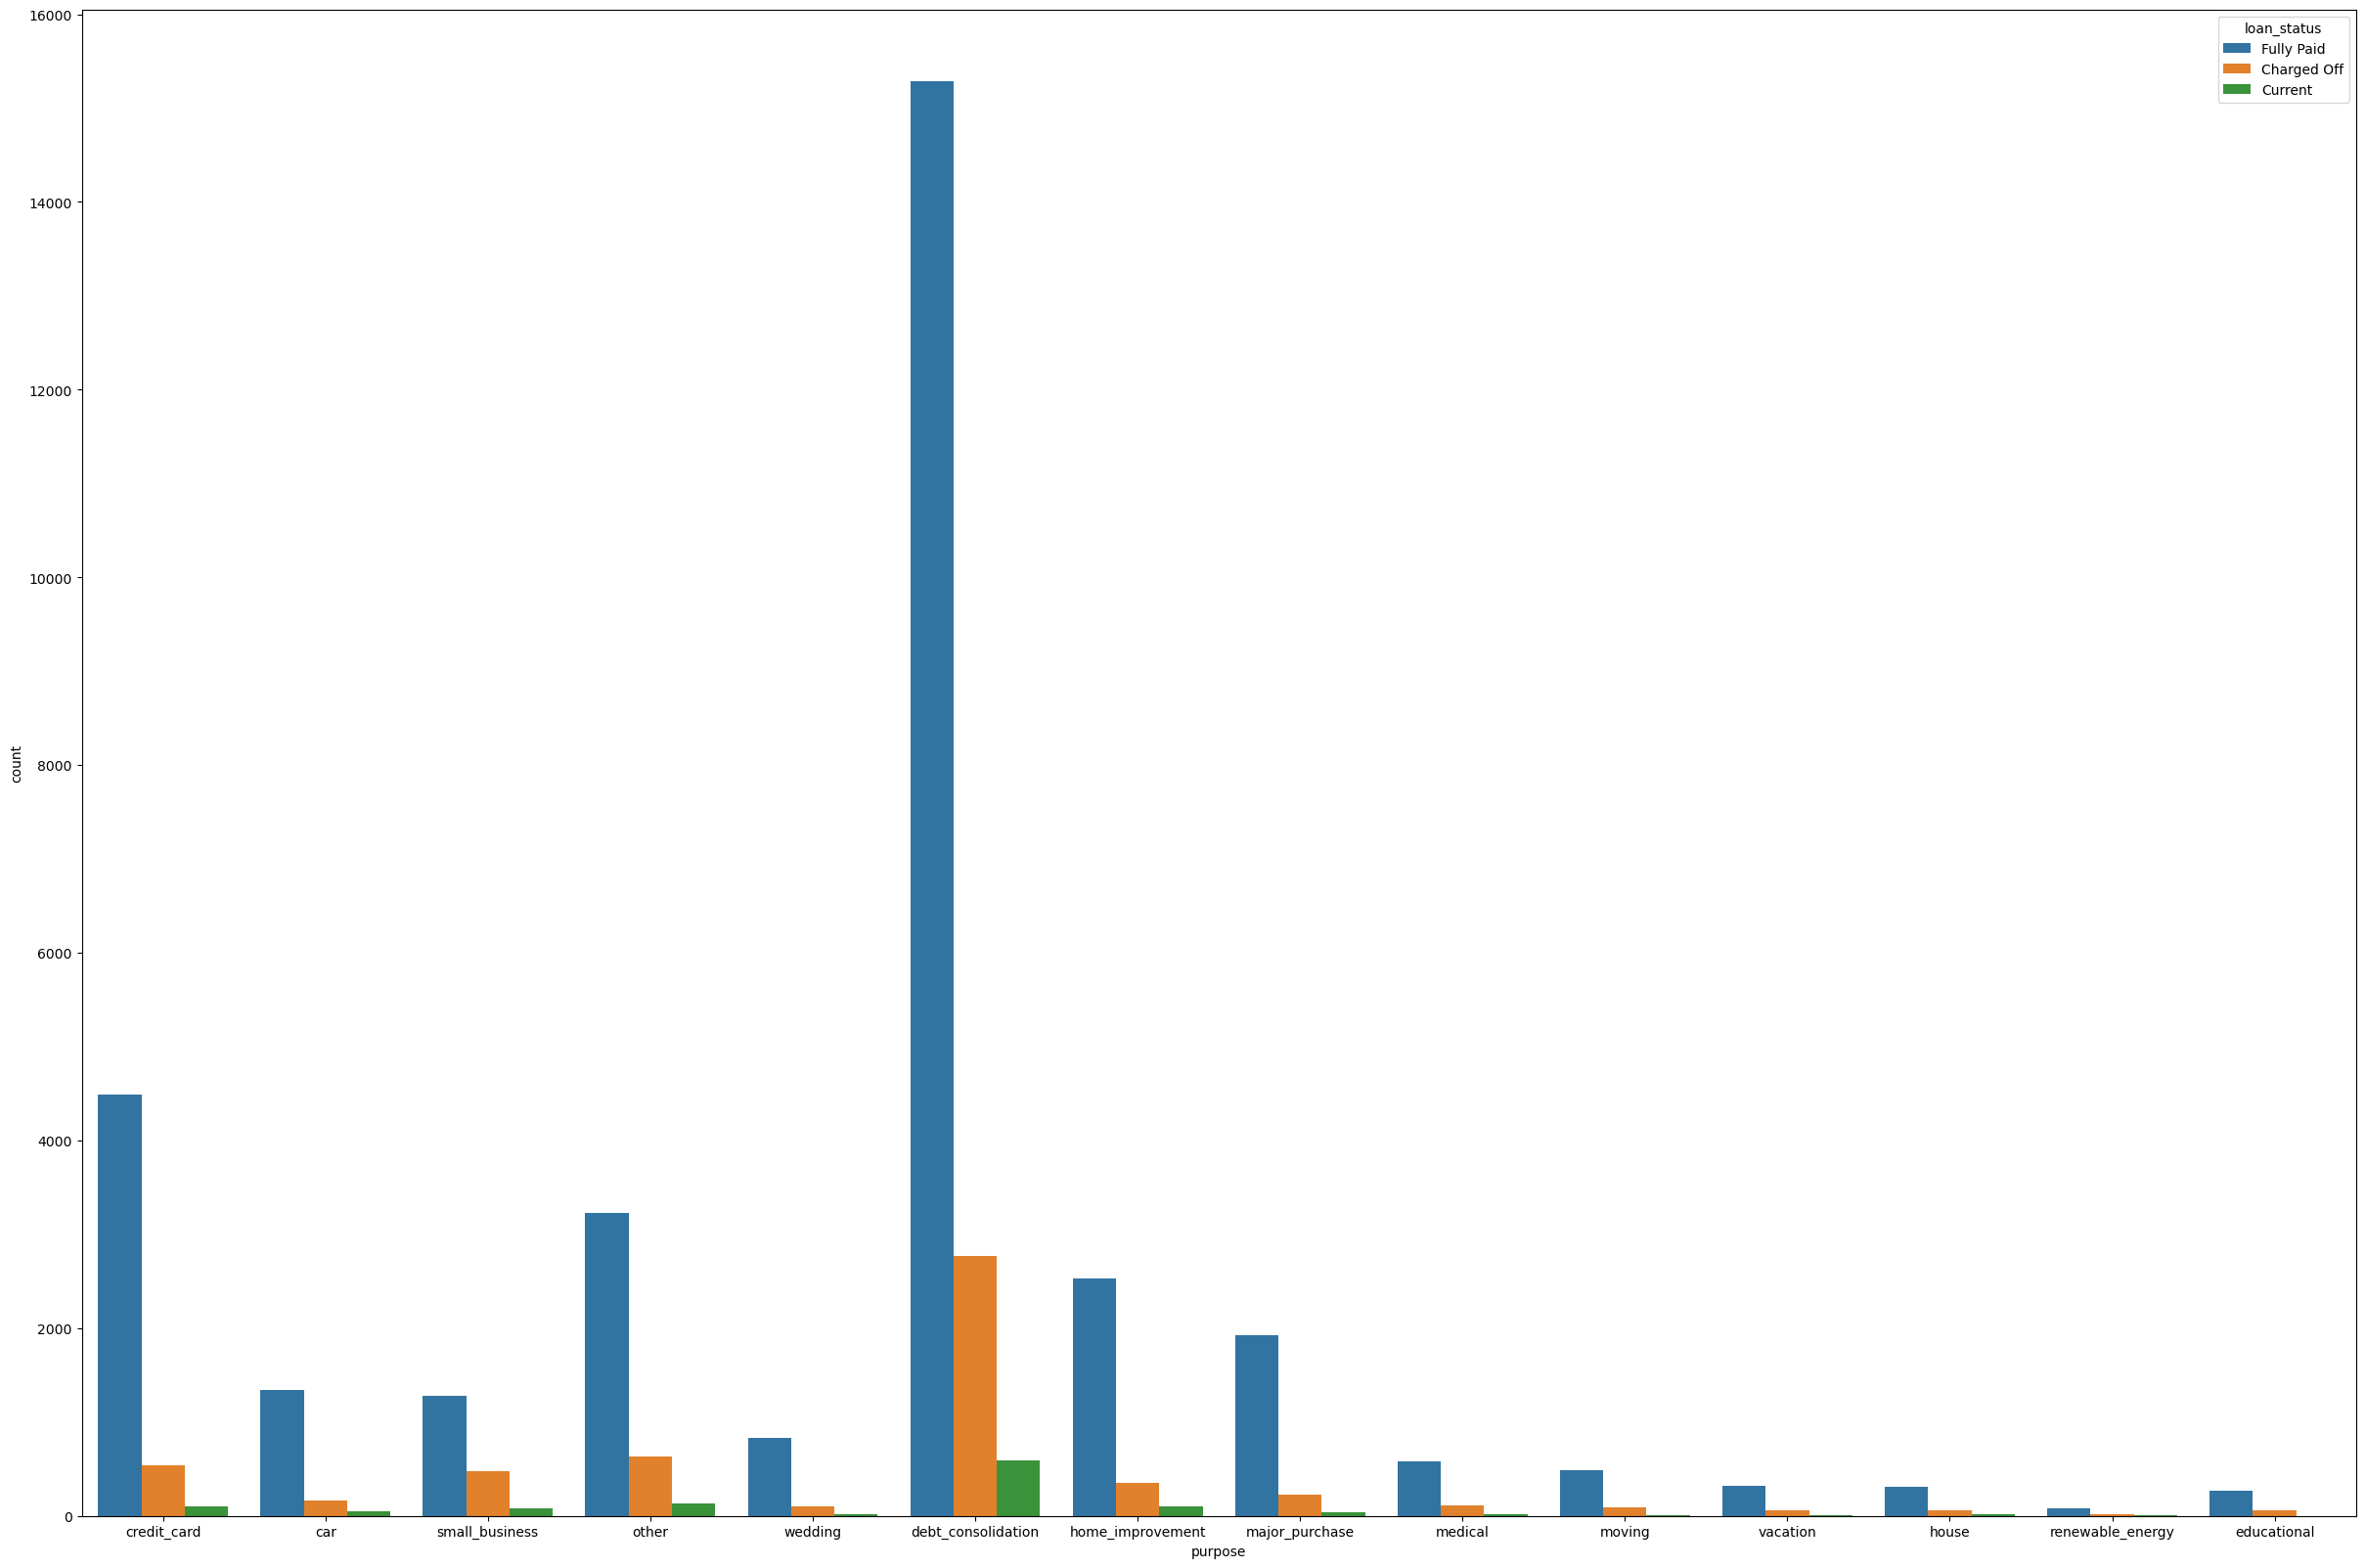

In [102]:
plt.figure(figsize=(30, 20))
showplot('purpose','loan_status')
## small business tend to default most

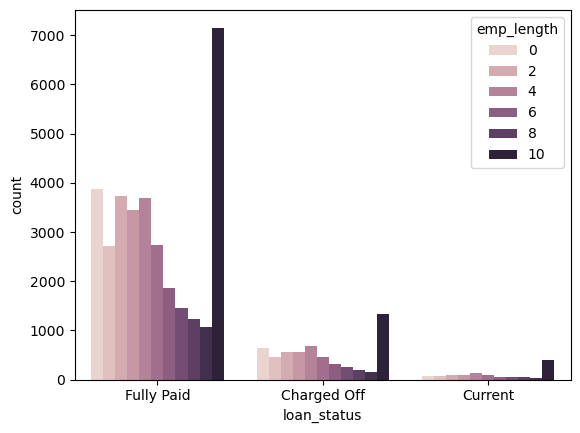

In [104]:
showplot('loan_status','emp_length')

# 10+ years emp length are less risky 

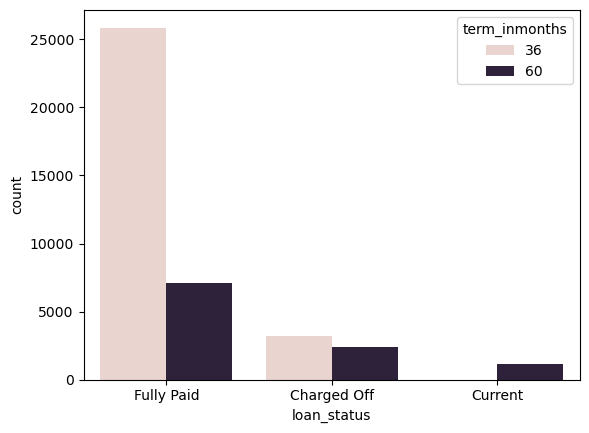

In [109]:
showplot('loan_status','term_inmonths')

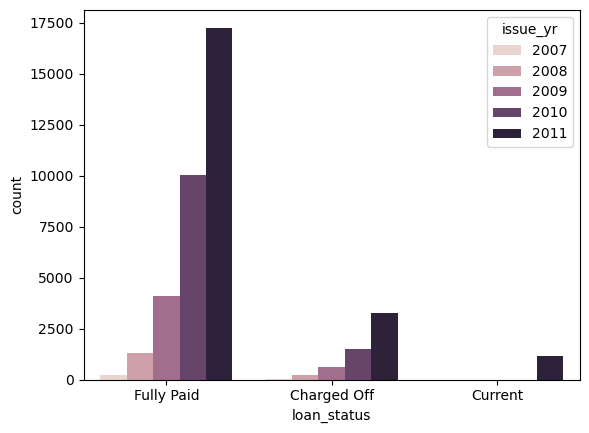

In [113]:
showplot('loan_status','issue_yr')

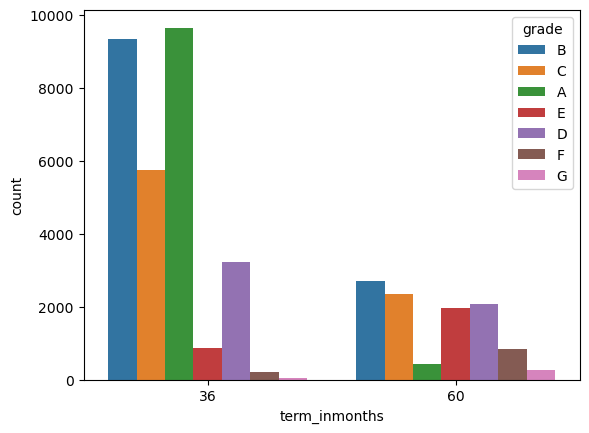

In [117]:
showplot('term_inmonths','grade')

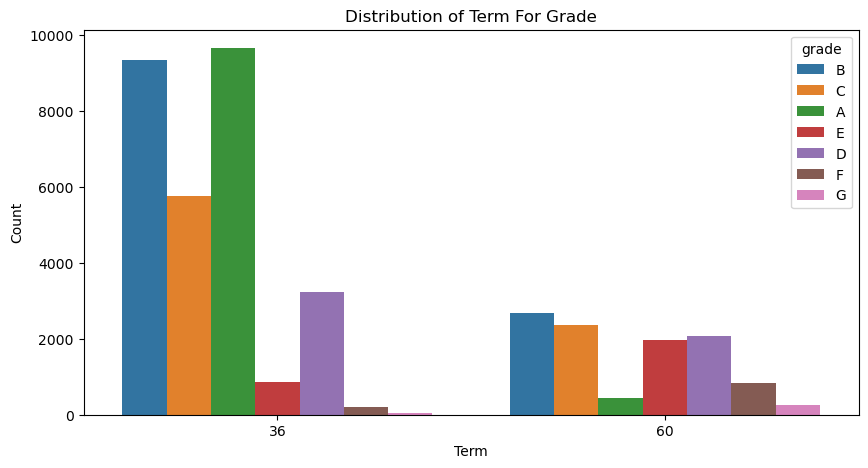

In [123]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='term_inmonths',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade')
plt.show()

# 36 month term majorily consist of both grade A and grade B loans 
# 60 month term mostly consist of grade B, C, D and E loans.

<function matplotlib.pyplot.show(close=None, block=None)>

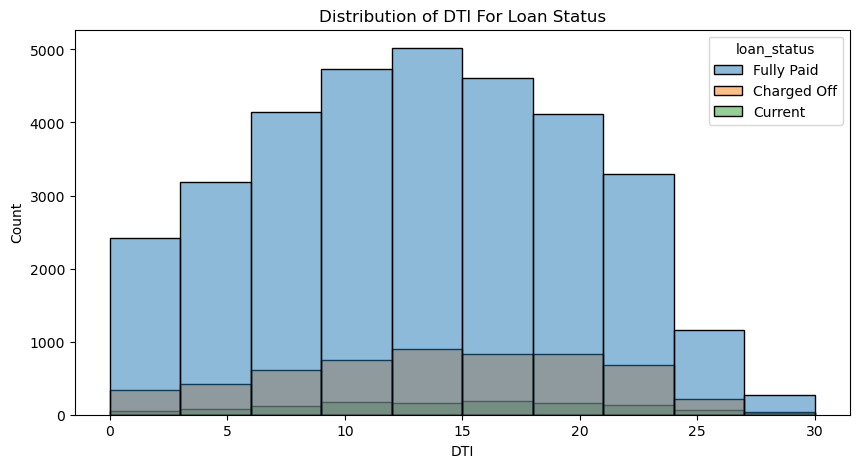

In [125]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status')
plt.show

# 

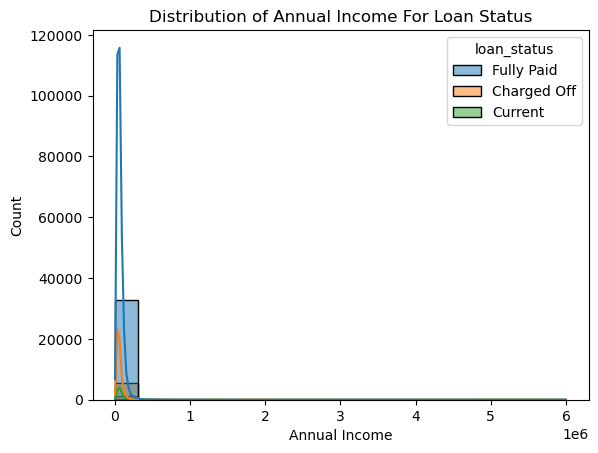

In [127]:
# Distribution of annual_inc based on loan_status
sns.histplot(data=data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status')
plt.show()

# People with less than xxxx annual income are more likely to default than higher annual income

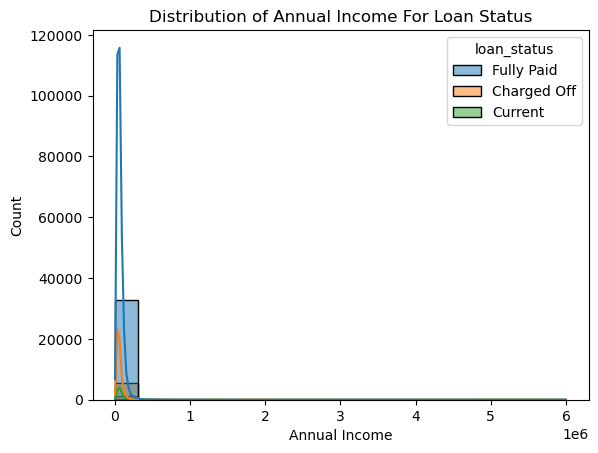

In [128]:
# Distribution of annual_inc based on loan_status
sns.histplot(data=data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

# The loan amount increases with interest rate till 17.5 % int rate

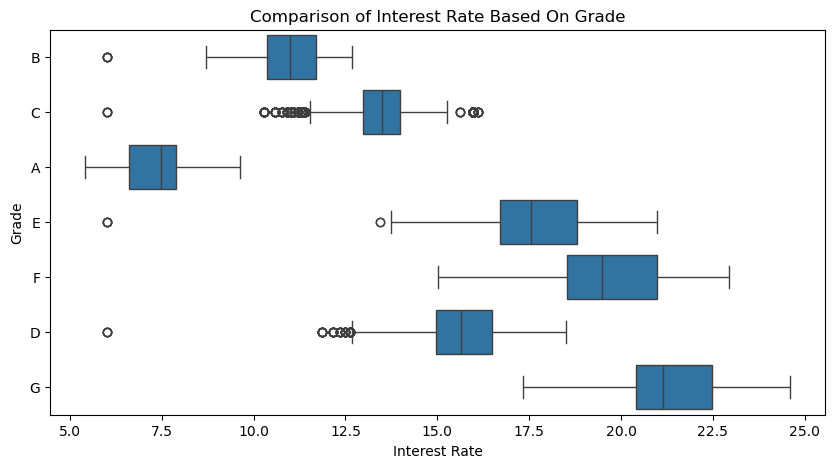

In [131]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

# higher intrest higher risk rate 

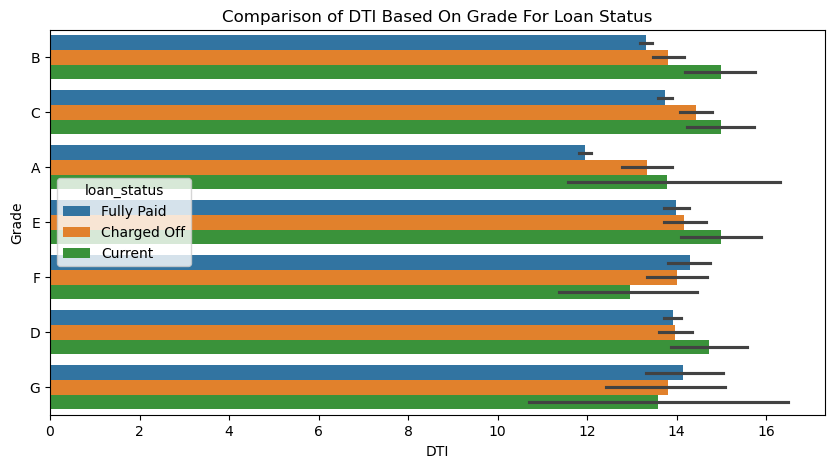

In [137]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

# The Grade A is less risky 
# Higher the grade more the chances of defaulters

In [139]:
correlation = data['loan_amnt'].corr(data['int_rate'])
print(f'Correlation between loan amount and interest rate: {correlation}')

## Slight Positive correlation

Correlation between loan amount and interest rate: 0.30941527364508437


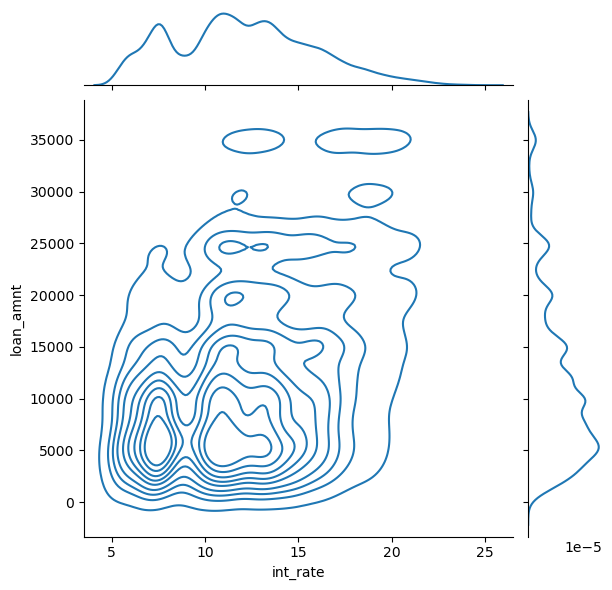

<Figure size 1000x500 with 0 Axes>

In [141]:
sns.jointplot(x='int_rate', y='loan_amnt', data=data, kind='kde')
plt.figure(figsize=(10,5))
plt.show()

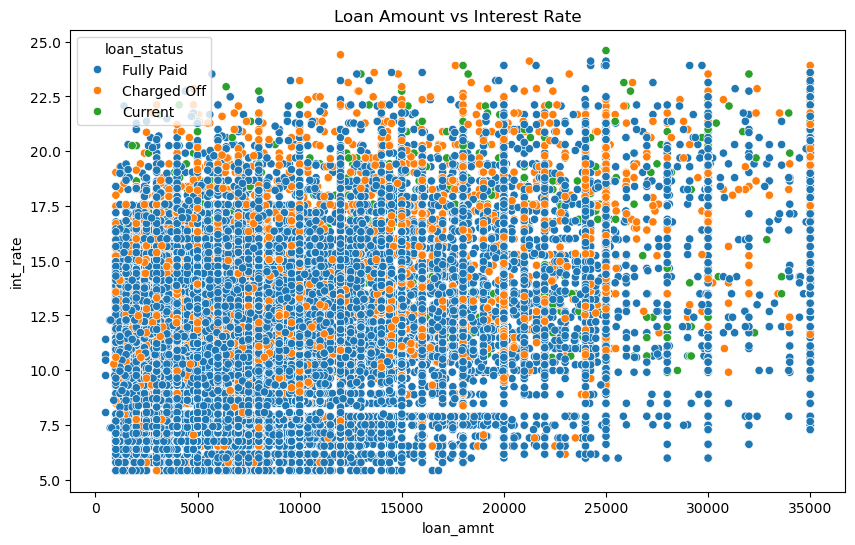

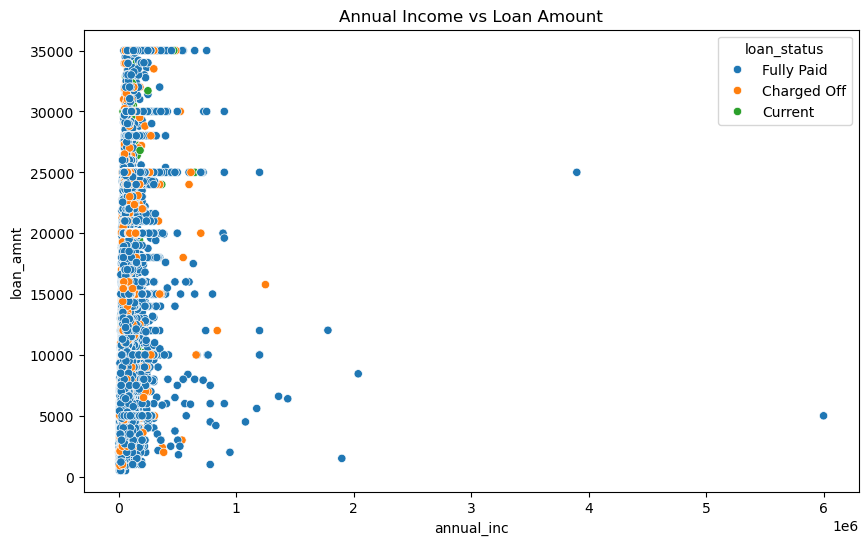

In [159]:
# Bivariate Analysis
def plot_bivariate(x, y, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y, hue='loan_status')
    plt.title(title)
    plt.show()

plot_bivariate('loan_amnt', 'int_rate', 'Loan Amount vs Interest Rate')
plot_bivariate('annual_inc', 'loan_amnt', 'Annual Income vs Loan Amount')

In [ ]:
#Insight

In [142]:
data['term_inmonths'].value_counts()

term_inmonths
36    29096
60    10621
Name: count, dtype: int64

In [143]:
data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [144]:
data['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [145]:
data['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
4.0     4511
2.0     4388
3.0     4095
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [146]:
data['grade'].value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [153]:
data['sub_grade'].value_counts()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [155]:
data['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64